# Lecture 07a:  Interactive plots. A Demo of Python Visualization Methods with `Plotly`

In the second part of this lecture, we discuss more theoretical concepts about plotting in Python.

[`Plotly-express` reading](https://plotly.com/python/plotly-express/)   

Must watch the first 15 minutes from this SciPy 2021 presentation:  
https://www.youtube.com/watch?v=FpCgG85g2Hw    

Run the notebook cell by cell while watching the presentation and:
* read the code,
* read about the use of each plot,
* read the info of the data presented in each plot.

The contents of the tutorial have been curated and edited by Thanasis Argyriou for the UOA BIS Postgrad python course.  

The original tutorial code is here:  
https://github.com/nicolaskruchten/scipy2021/blob/main/styled.ipynb  

In [51]:
# Use to suppress (ignore) warnings.
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import plotly.express as px

## 1. The GAPMINDER dataset.   

Each row represents:
* a country,
* its fife expectancy,
* population,
* GDP per capita,
* on given year.  

We have: 1074 rows in the data.

In [52]:
df = px.data.gapminder()
type(df)

pandas.core.frame.DataFrame

In [53]:
df.sample(5, random_state=1) # randomness always the same for all, everytime.

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
708,Indonesia,Asia,1952,37.468,82052000,749.681655,IDN,360
1353,Sierra Leone,Africa,1997,39.897,4578212,574.648158,SLE,694
491,Equatorial Guinea,Africa,2007,51.579,551201,12154.089750,GNQ,226
703,India,Asia,1987,58.553,788000000,976.512676,IND,356
1286,Rwanda,Africa,1962,43.000,3051242,597.473073,RWA,646


In [54]:
len(df)

1704

### pandas query method for year 2007: 142 rows, meaning 142 countries.  

In [55]:
# select only year 2007
df = df.query("year == 2007")

df.sample(5, random_state=1)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
947,Malaysia,Asia,2007,74.241,24821286,12451.655800,MYS,458
1403,Somalia,Africa,2007,48.159,9118773,926.141068,SOM,706
383,Croatia,Europe,2007,75.748,4493312,14619.222720,HRV,191
71,Australia,Oceania,2007,81.235,20434176,34435.367440,AUS,36
1511,Taiwan,Asia,2007,78.400,23174294,28718.276840,TWN,158


In [56]:
len(df)

142

In [57]:
len(df.country.unique())

142

## 2. Basic interactive plots.

### Strip  plot, also known as dot plot.  

A scatterplot where one variable is categorical: https://en.wikipedia.org/wiki/Dot_plot_(statistics).

In [58]:
# simplest version
fig = px.strip(
    df,
    x="lifeExp"
)  # Assign a name to a figure

fig.show()  # Call explicitly to show the figure

In [59]:
# px.strip?

In [60]:
# add country names to hover on mouse.
px.strip(
    df,
    x="lifeExp", 
    hover_name="country"
)

In [61]:
px.strip(
    df,
    x="lifeExp", 
    hover_name="continent", 
    color= "country"
)

In [62]:
px.strip(df,
         x="lifeExp", 
         hover_name="country", 
         color= "continent"
        )

### Histogram  
https://en.wikipedia.org/wiki/Histogram

In [63]:
px.histogram(df,
             x="lifeExp", 
             hover_name="country", 
             color= "continent", 
             marginal="rug"
            )

In [64]:
px.histogram(df, x="lifeExp", 
             y="pop",
             hover_name="country",
             color= "continent",
             marginal="rug"
            )

In [65]:
px.histogram(df, 
             x="lifeExp", 
             y="pop",
             hover_name="country", 
             color= "continent",
             marginal="rug",
             facet_col="continent"
            )

### Bar chart and stacked bar chart 
https://en.wikipedia.org/wiki/Bar_chart

In [66]:
# stacked bar chart
px.bar(
    df, 
    x="pop", 
    y="continent", 
    color= "lifeExp", 
    hover_name="country"
)

### Sunburst diagramm
Used to represent "part-to-whole-relationships", nested structures, tree-like structures.  

Also known as ```multi-level pie chart```, or ```ring chart```.  
https://en.wikipedia.org/wiki/Pie_chart#Ring

In [67]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [68]:
px.sunburst(df,
            values="pop",
            path=["continent", "country"],
            color= "lifeExp",
            hover_name="country",
            height=400
           )

### Treemap diagram
Used to show hierachical data (tree-like) structures in nested boxes.  
https://en.wikipedia.org/wiki/Treemapping

In [69]:
# Use to show tree like structures in nested boxes.

px.treemap(df,
           values="pop",
           path=["continent", "country"],
           color= "lifeExp",
           hover_name="country",
            custom_data=["gdpPercap"],  # add GDP per capita as custom data
           hover_data=["gdpPercap"],  # display GDP per capita in hover data
            labels={"gdpPercap": "GDP per Capita"},  # display GDP per capita in the box
           color_continuous_scale='RdYlGn',
           height=500,
           width=800
          )

### Choropleth diagram   
https://en.wikipedia.org/wiki/Choropleth_map  
Use intensity of color to map values of data to geolocation.

In [70]:
px.choropleth(df,
              locations="iso_alpha",
              color= "lifeExp",
              hover_name="country"
             )

### Scatter plot
https://en.wikipedia.org/wiki/Scatter_plot  

Bi-variate relationship representation.

In [71]:
# px.scatter?

In [72]:
px.scatter(
    data_frame=df,
    x="gdpPercap",
    y="lifeExp",
    hover_name="country",
    height=400
)

In [73]:
# log of x axis, relate bubble size to population
fig = px.scatter(
        df,
        x="gdpPercap",
        y="lifeExp",
        hover_name="country",
        color="continent",
        size="pop",
        size_max=60,
        log_x=True, height=400
)

fig.show()

### Check attributes of plotly "figure objects."  
They are dictionaries of attributes. Update attributes to control the figure.

In [74]:
# try the filter search bar at the right of this cell's output.
fig.show("json")

## 2. Detailed plot of significant dimensions of the GAPMINDER dataset.   

Each row represents a country, its fife expectancy, population and GDP per capita on a given year.  
142 rows for year 2007 => 142 countries.  

In [75]:
df = px.data.gapminder().query("year == 2007")  # Reassign because I may have changed something.

In [76]:
# Create plot object and assign to a value
fig = px.scatter(
    df, 
    y="lifeExp",
    x="gdpPercap", 
    color="continent", 
    log_x=True, 
    size="pop", 
    size_max=60,
    hover_name="country", 
    height=600, width=1000, 
    template="simple_white", 
    color_discrete_sequence=px.colors.qualitative.G10,
    title="Health vs Wealth 2007",
    labels=dict(
            continent="Continent", pop="Population",
            gdpPercap="GDP per Capita (US$, price-adjusted)", 
            lifeExp="Life Expectancy (years)")
)

# Update layout
fig.update_layout(
    font_family="Rockwell",
    legend=dict(
        orientation="h", 
        title="", 
        y=1.1, 
        x=1, 
        xanchor="right", 
        yanchor="bottom")
)

# Update x and y axes
fig.update_xaxes(tickprefix="$", range=[2,5], dtick=1)
fig.update_yaxes(range=[30,90])

fig.add_hline((df["lifeExp"]*df["pop"]).sum()/df["pop"].sum(), line_width=1, line_dash="dot")
fig.add_vline((df["gdpPercap"]*df["pop"]).sum()/df["pop"].sum(), line_width=1, line_dash="dot")

fig.show()

## 4. Curated, extra stylized version of plot.

In [77]:
df = px.data.gapminder().query("year == 2007")

fig = px.scatter(
    df, 
    y="lifeExp", 
    x="gdpPercap", 
    color="continent",
    log_x=True, 
    size="pop", 
    size_max=60, 
    hover_name="country",
    height=600, 
    width=900, 
    template="simple_white", 
    color_discrete_sequence=px.colors.qualitative.G10,
    title="Health vs Wealth 2007",
    # this dictionary syntax is more readable.
    labels=dict(
            continent="Continent", pop="Population",
            gdpPercap="GDP per Capita (US$, price-adjusted)", 
            lifeExp="Life Expectancy (years)")
)


fig.update_layout(
        font_family="Rockwell",
        legend=dict(
            orientation="h", title="", y=1.1, x=1,
            xanchor="right", yanchor="bottom")
)

fig.update_xaxes(tickprefix="$", range=[2,5], dtick=1)
fig.update_yaxes(range=[35,90])

fig.add_hline((df["lifeExp"]*df["pop"]).sum()/df["pop"].sum(), line_width=1, line_dash="dot")
fig.add_vline((df["gdpPercap"]*df["pop"]).sum()/df["pop"].sum(), line_width=1, line_dash="dot")

fig.show()

## Uncomment any line below to save to selected file version.

# fig.write_html("gapminder_2007.html") # interactive file type for websites.
# fig.write_json("gapminder_2007.json") # serialized export

In [78]:
### To save as .svg you need kaleido.
## Image export using the "kaleido" engine requires the kaleido package,
## which can be installed using pip: $ pip install -U kaleido

# fig.write_image("gapminder_2007.svg") # static, non-interactive export.

## 5. Expanded Gapminder data examples by Thanasis Argyriou

### Faceted scatterplot. Using data for more years.

In [79]:
df_all_years = px.data.gapminder()
df_all_years.sample(5, random_state=3)

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
1127,Niger,Africa,2007,56.867,12894865,619.676892,NER,562
610,Guatemala,Americas,2002,68.978,11178650,4858.347495,GTM,320
475,El Salvador,Americas,1987,63.154,4842194,4140.442097,SLV,222
197,Burkina Faso,Africa,1977,46.137,5889574,743.387037,BFA,854
1264,Reunion,Africa,1972,64.274,461633,5047.658563,REU,638


In [80]:
df_all_years.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num'],
      dtype='object')

In [81]:
# 12 yearly periods data
df_all_years.year.unique()

array([1952, 1957, 1962, 1967, 1972, 1977, 1982, 1987, 1992, 1997, 2002,
       2007])

In [82]:
# 12 yearly periods data
df_all_years.year.unique().size
# len(df_all_years.year.unique()) # same result as above.

12

In [83]:
# 1700 rows
len(df_all_years)

1704

#### The plot below is a typical example of the very bad practive of "overplotting".  
This is just to demonstrate the code.  

In [84]:
# add facets by year in 4 columns on chart
fig = px.scatter(
    df_all_years, 
    x='gdpPercap', 
    y='lifeExp', 
    color='continent',
    size='pop', 
    hover_name="country",
    facet_col='year', 
    facet_col_wrap=4, # add facets by year in 4 columns on chart
    log_x=True, 
    height=800, width=1100
)

fig.update_xaxes(tickprefix="$", dtick=1)

fig.show()

#### Homework assignment: Make a useful and beautiful faceted plot.  
Do what you think would make this date useful and beautiful in a faceted plot.    
E.g.:    
Chose only some periods.  
Chose two continents to compare such as Asia VS Africa, or Europe VS Americas.   
Or chose some countries or a single country from a continent to compare with another group of countries.   
You may create groups of countries and add a new dimension "groups", e.g. EU, EZ, Balkans, OECD, Northern America.    
For country groups you may check World Bank groups.

### Animated plot with slider and play button.

In [85]:
df = px.data.gapminder()

fig = px.scatter(
    df, y="lifeExp", 
    x="gdpPercap", 
    color="continent",
    size="pop", 
    size_max=50, h
    over_name="country",
    animation_frame="year", 
    animation_group="country",
    height=600, width=950, 
    template="simple_white", 
    color_discrete_sequence=px.colors.qualitative.G10,
    log_x=True, 
    range_x=[100,100000], 
    range_y=[25,90],
    title="Health vs Wealth, 1952-2007",
    ##this dictionary syntax below is more readable.
    labels=dict(
        continent="Continent", pop="Population",
        gdpPercap="GDP per Capita (US$, price-adjusted)", 
        lifeExp="Life Expectancy (years)")
    )

fig.update_layout(
    font_family="Rockwell",
    legend=dict(
        orientation="h", title="", y=1, x=0.9,
        xanchor="right", yanchor="bottom")
)

fig.update_xaxes(tickprefix="$", dtick=1)
# fig.update_yaxes(range=[35,90])

# comment this line to remove play, pause buttons
#fig["layout"].pop("updatemenus")
fig.show()

## Uncomment line below to save to necessary file version.
# fig.write_html("gapminder_1952-2007.html")

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2558623247.py, line 8)

### Animated plot with slider.

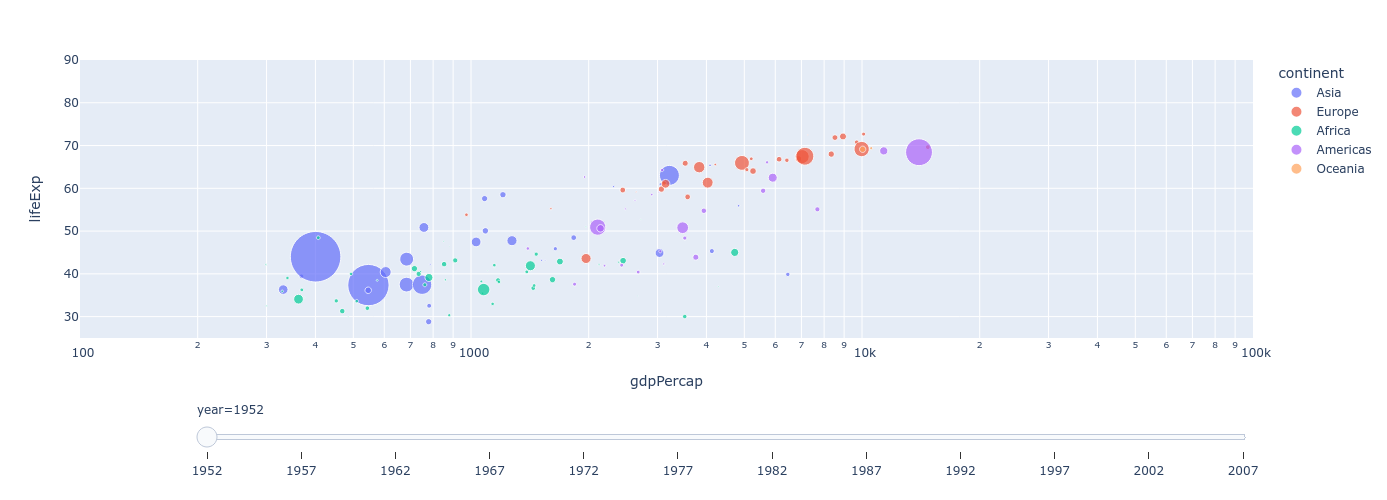

In [ ]:
# Basic example below from https://plotly.com/python/animations/

df = px.data.gapminder()

fig = px.scatter(
    df, 
    x="gdpPercap", 
    y="lifeExp",
    animation_frame="year", 
    animation_group="country",
    size="pop", 
    color="continent", 
    hover_name="country",
    height=500, width=900,
    log_x=True, 
    size_max=55, 
    range_x=[100,100000], 
    range_y=[25,90]
                )

# comment out this line to bring back the play, pause buttons.
fig["layout"].pop("updatemenus") # optional, drop animation buttons

fig.show()

### WIP: Annotate selected country  
Work in Progress (this is a "quick-and-dirty" hacky solution)  
Example A

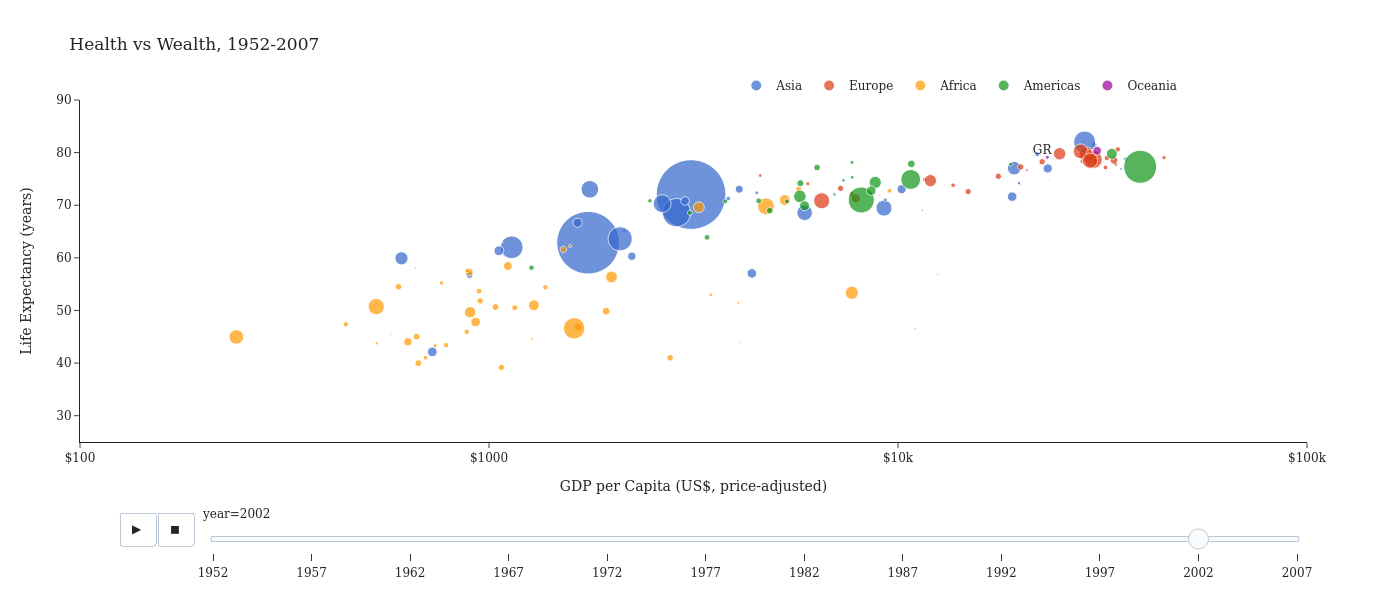

In [ ]:
fig = px.scatter(
    df, 
    y="lifeExp", 
    x="gdpPercap", 
    color="continent",
    
    # add text over selected country:
    #text = df.country, This works and shows all countries
    #text = (df.country == "Greece"), # this results to "true" and works.

    text = (df.country == "Greece").replace(True, "GR"),  
    size="pop", 
    size_max=50, 
    hover_name="country",
    animation_frame="year", 
    animation_group="country",
    height=600, width=1000, 
    template="simple_white", 
    color_discrete_sequence=px.colors.qualitative.G10,
    log_x=True, 
    range_x=[100,100000], 
    range_y=[25,90],
    title="Health vs Wealth, 1952-2007",
    # This dictionary syntax below is more readable.
    labels=dict(
        continent="Continent", pop="Population",
        gdpPercap="GDP per Capita (US$, price-adjusted)", 
        lifeExp="Life Expectancy (years)")
)

fig.update_traces(textposition='top center')

fig.update_layout(
    font_family="Rockwell", 
    legend=dict(
        orientation="h", title="", y=1, x=0.9,
        xanchor="right", yanchor="bottom")
)

fig.update_xaxes(tickprefix="$", dtick=1)
# fig.update_yaxes(range=[35,90])

# comment this line to remove play, pause buttons
#fig["layout"].pop("updatemenus")
fig.show()

## Uncomment line below to save to necessary file version.
# fig.write_html("gapminder_1952-2007.html")

#### Work in Progress (this is another "quick-and-dirty" hacky solution) Example B

In [ ]:
fig = px.scatter(
    df, y="lifeExp", x="gdpPercap", color="continent",
    
    # add text over selected country:
    #text = ((df.country == "Greece")).replace(True, "GR"),  # super fast hacky solution
    
    # this works too and is syntatically correct
    text = ["GR" if country_name == True else "" for country_name in (df.country == "Greece")], 
    size="pop",
    size_max=50,
    hover_name="country",
    animation_frame="year",
    animation_group="country",
    height=600, width=1000,
    template="simple_white", 
    color_discrete_sequence=px.colors.qualitative.G10,
    log_x=True,
    range_x=[100, 100000],
    range_y=[25, 90],
    title="Health vs Wealth, 1952-2007",
    ##this dictionary syntax below is more readable.
    labels=dict(
        continent="Continent", pop="Population",
        gdpPercap="GDP per Capita (US$, price-adjusted)", 
        lifeExp="Life Expectancy (years)"))

fig.update_traces(textposition='top center')

fig.update_layout(
    font_family="Rockwell",
    legend=dict(
        orientation="h", title="", y=1, x=0.9,
        xanchor="right", yanchor="bottom")
)

fig.update_xaxes(tickprefix="$", dtick=1)
# fig.update_yaxes(range=[35,90])

# comment this line to remove play, pause buttons
#fig["layout"].pop("updatemenus")
fig.show()

## Uncomment line below to save to necessary file version.
# fig.write_html("gapminder_1952-2007.html")

### WIP: Add three sliders to use as filters on the same graph  
This is for illustration purposess only. Do try this at home.  
From: https://stackoverflow.com/a/69572908

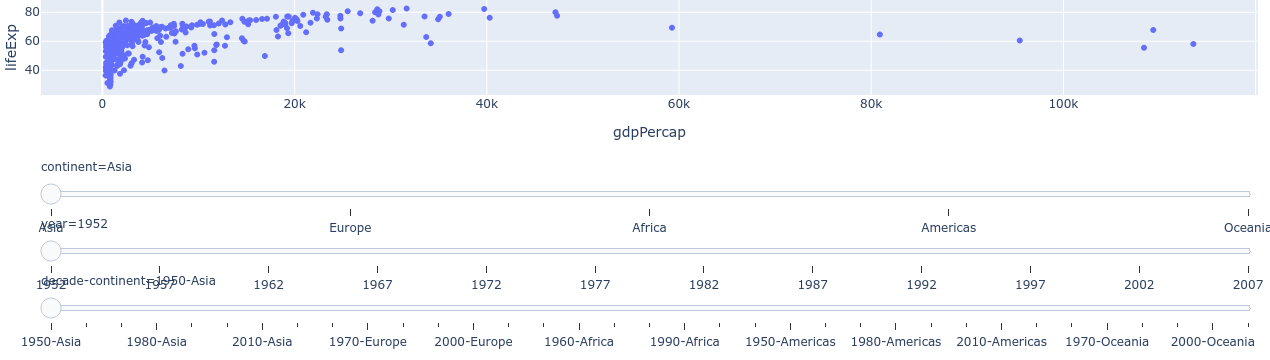

In [ ]:
#     concept
#         use plotly express to create a figure for each animation frame
#         build up all frames from step 1
#         build up layout, primarily sliders from figures in step 1
#         finally build a new figure from steps 2 & 3
#     limitations
#         space... sliders that a lot of space
#         each slider is independent, last selected slider is what is shown. No visual cue

import plotly.graph_objects as go

# fig = px.scatter(
#     df, y="lifeExp", x="gdpPercap", color="continent",  
#     size="pop", size_max=50, hover_name="country",
#     color_discrete_sequence=px.colors.qualitative.G10,
# add another column to "animate" on.

# Create a decades column
df["decade-continent"] = df.apply(
    lambda x: f'{round(x["year"], -1)}-{x["continent"]}', axis=1)

# use px to do heavy lifting construction
figs = [px.scatter(
        df, x="gdpPercap", y="lifeExp", animation_frame=ac,
        # log_x=True
)

# columns that become sliders
for ac in ["continent", "year", "decade-continent"]]

# extract frames and sliders from each of the animated figures
layout = figs[0].to_dict()["layout"]
layout.pop("updatemenus") # don't want play and pause buttons
layout["sliders"] = []
frames = []

for i, f in enumerate(figs):
    slider = f.to_dict()["layout"]["sliders"]
    slider[0]["y"] = -0.6 * i
    slider[0]["x"] = 0
    slider[0]["len"] = 1

    layout["sliders"] += slider
    frames += f.frames

# finally build the figure with multiple sliders
go.Figure(data=figs[0].data, frames=frames, layout=layout).update_layout(
    margin={"l": 0, "r": 0, "t": 0, "b": 0}, height=600)

Detailed configuration arguments for animations:    
https://plotly.com/python/v3/gapminder-example/

## 6. Extra: bokeh, a library similar to plotly.

[bokeh demo](https://demo.bokeh.org/)

A similar tutorial for bokeh libary using the gapminder dataset.    
https://demo.bokeh.org/gapminder   
https://www.kaggle.com/code/parulpandey/recreating-gapminder-visualisation-with-bokeh/notebook

The original retro presentation of the GAPMINDER data:   
https://www.youtube.com/watch?v=hVimVzgtD6w&t=275s

## 7. Extra 2: More ugly plots guess [by who.](https://run4more.gr/jacobs-douwe-egberts-challenge/distance-hours-board-jde-2022/)  
To be precise: more plots, which are also more ugly.